# Portfolio optimization

Download csv data from:

http://www.google.com/finance/historical?output=csv&q= [COMPANY KEY]

In [1]:
import csv
from __future__ import division 
import numpy as np
import pandas as pd

Now we compute the weekly returns for each stock value

In [2]:
import numpy as np


data_apple_open=np.array(pd.read_csv('/home/alessandro/git/optimization-for-large-scale-data/Topic3/aapl.csv',delimiter=',',usecols=['Open']))
data_apple_close=np.array(pd.read_csv('/home/alessandro/git/optimization-for-large-scale-data/Topic3/aapl.csv',delimiter=',',usecols=['Close']))

data_ebay_open=np.array(pd.read_csv('/home/alessandro/git/optimization-for-large-scale-data/Topic3/ebay.csv',delimiter=',',usecols=['Open']))
data_ebay_close=np.array(pd.read_csv('/home/alessandro/git/optimization-for-large-scale-data/Topic3/ebay.csv',delimiter=',',usecols=['Close']))

data_amazon_open=np.array(pd.read_csv('/home/alessandro/git/optimization-for-large-scale-data/Topic3/amzn.csv',delimiter=',',usecols=['Open']))
data_amazon_close=np.array(pd.read_csv('/home/alessandro/git/optimization-for-large-scale-data/Topic3/amzn.csv',delimiter=',',usecols=['Close']))

data_microsoft_open=np.array(pd.read_csv('/home/alessandro/git/optimization-for-large-scale-data/Topic3/msft.csv',delimiter=',',usecols=['Open']))
data_microsoft_close=np.array(pd.read_csv('/home/alessandro/git/optimization-for-large-scale-data/Topic3/msft.csv',delimiter=',',usecols=['Close']))


cont=-1;
n=5;
size=len(data_apple_open)
data_apple=np.zeros(size//n)
data_ebay=np.zeros(size//n)
data_amazon=np.zeros(size//n)
data_microsoft=np.zeros(size//n)
for i in np.linspace(n+1,n*(size//n),size//n):
    i=int(i)
    if i >n:
        cont=cont+1
        data_apple[cont]=np.subtract(data_apple_close[i],data_apple_open[i-n])/data_apple_open[i-n]
        data_ebay[cont]=(data_ebay_close[i]-data_ebay_open[i-n])/data_ebay_open[i-n]
        data_amazon[cont]=(data_amazon_close[i]-data_amazon_open[i-n])/data_amazon_open[i-n]
        data_microsoft[cont]=(data_microsoft_close[i]-data_microsoft_open[i-n])/data_microsoft_open[i-n]
data_apple

array([ 0.04008257, -0.01304922, -0.01578643, -0.06508378,  0.00304169,
       -0.01128628,  0.06203129, -0.02567846,  0.01782372, -0.01270239,
        0.00382256,  0.00374231,  0.00937938, -0.00784212,  0.05518669,
        0.02321779,  0.01830428, -0.06004384,  0.02220428,  0.00953507,
        0.00070749,  0.00908237,  0.01719825,  0.01056176, -0.00207151,
       -0.03695769,  0.00159236,  0.01880609, -0.05615053, -0.01405152,
       -0.00779528, -0.00994986,  0.0254736 , -0.01707048,  0.02631579,
        0.00883088,  0.02901354, -0.02261191, -0.06560339, -0.02382936,
       -0.04577703, -0.04879786,  0.01718182,  0.01052824, -0.00248183,
       -0.05731697,  0.07285889,  0.04029404,  0.04511013, -0.02447582])

Compute the mean return vector $\mu$ and the covariance matrix $\Sigma$

In [3]:
import numpy as np
#compute mean value vector
mu=np.mean([data_apple,data_ebay,data_amazon,data_microsoft],axis=1)
print(mu)
#compute covarianze matrix
covar=np.matrix(np.cov([data_apple,data_ebay,data_amazon,data_microsoft]))
print(covar)

[-0.00088973  0.0242455  -0.0142025   0.00066933]
[[  1.04152842e-03   9.44271695e-04   7.17481572e-04   5.15708614e-04]
 [  9.44271695e-04   3.59933459e-02  -6.58612794e-05   1.46089683e-03]
 [  7.17481572e-04  -6.58612794e-05   1.28670205e-03   4.33891329e-04]
 [  5.15708614e-04   1.46089683e-03   4.33891329e-04   1.48533899e-03]]


We solve the portfolio optimization problem 

\begin{align*}
\text{maximize}_x\quad & \mu^T x - \frac{1}{2}\ \gamma\ x^T \Sigma x \\
\text{subject to}\quad  & \sum x_i = 1,
\end{align*}


In [4]:
from scipy.optimize import minimize

def portfolio(x, mu, covar, gamma):
    return -np.dot(x,mu)+0.5*gamma*np.dot(np.dot(x,covar),x)    

cons = ({'type': 'eq','fun' : lambda x: sum(x)-1})
bnds = ((0, 1), (0, 1), (0, 1), (0, 1))
gamma=3
x0 = np.array([0, 0, 0, 0])

res = minimize(portfolio, x0, args=(mu, covar, gamma), method='SLSQP', constraints=cons, options={'disp': True,'ftol': 1e-10})
#res = minimize(portfolio, x0, args=(mu, covar, gamma), method='SLSQP', constraints=cons, bounds=bnds, options={'disp': True,'ftol': 1e-10})
print (res.x) 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: [[-0.03139668]]
            Iterations: 15
            Function evaluations: 90
            Gradient evaluations: 15
[ 4.38578348  0.10306454 -4.91170621  1.42285819]


From KKT conditions, the solution is:
$$
    x^* = \frac{1}{\gamma}\Sigma^{-1}\mu - \frac{\lambda_{\gamma}}{\gamma}\Sigma^{-1} e,
$$
where $\lambda_{\gamma} = \frac{\mu^T \Sigma^{-1} e - \gamma}{e^T \Sigma^{-1} e}$


In [5]:
lambda_opt=(np.dot(np.dot(mu,np.linalg.inv(covar)),np.ones(mu.shape))-gamma)/np.dot(np.dot(np.ones(mu.shape),np.linalg.inv(covar)),np.ones(mu.shape))
x_opt=(1/gamma)*np.dot(np.linalg.inv(covar),mu)-(1/gamma)*np.dot(lambda_opt,np.dot(np.linalg.inv(covar),np.ones(mu.shape)))
print(lambda_opt)
print(x_opt)

[[-0.00651462]]
[[ 4.38579003  0.10307012 -4.91172826  1.42286811]]


We  can plot the efficient frontier:

In [6]:
nmax=1000;
expec_vector=np.zeros(nmax)
risk_vector=np.zeros(nmax)
cont=-1
cons = ({'type': 'eq','fun' : lambda x: sum(x)-1})
bnds = ((0, 1), (0, 1), (0, 1), (0, 1)) #incluyo reestricciones
for gamma in np.linspace(1,100,nmax):
    cont=cont+1
    x0 = np.array([0, 0, 0, 0])
    res = minimize(portfolio, x0, args=(mu, covar, gamma), method='SLSQP', constraints=cons,bounds=bnds, options={'disp': False,'ftol': 1e-15})  
    x_opt=np.array(res.x)
    mu=np.array(mu)
    expec_vector[cont]=np.dot(mu,x_opt.T)
    risk_vector[cont]=np.dot(np.dot(x_opt,covar),x_opt.T)


(<matplotlib.collections.PathCollection at 0x17940e80>,
 <matplotlib.text.Text at 0x26bd128>)

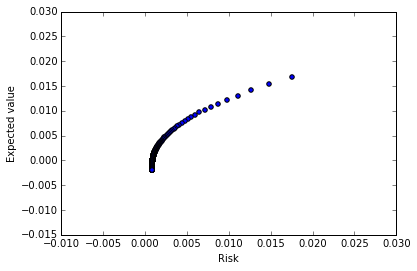

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(risk_vector,expec_vector),plt.ylabel('Expected value'),plt.xlabel('Risk')

Lest solve it by applying a barrier method:
$$
\min_x\quad  -\mu^T x + \frac{1}{2}\ \gamma\ x^T \Sigma x  + \frac{\rho}{2}(x^Te - 1)^2
$$

$\rightarrow$ Step 1: initial point $x^{(0)}$, penalization parameter $\rho_1>0$ and $t=1$. Let $\epsilon>0$ be the tolerance parameter and $\eta >1$ a fixed parameter. 

$\rightarrow$ Step 2: solve  $\min_x\quad  -\mu^T x + \frac{1}{2}\ \gamma\ x^T \Sigma x  + \frac{\rho_t}{2}(x^Te - 1)$, by a descent direction method (ex. gradient). Use $x^{(t-1)}$ as initial point. Solution$=x^{(t)}$. 

$\rightarrow$ Step 3: if $\| x^{(t)}-x^{(t-1)}\|<\epsilon$ stop. Otherwise go to step 4.

$\rightarrow$ Step 4: $\rho_{t+1}=\eta\rho_{t}$, $t=t+1$, go to step 2.

For the gradient method we need the gradient:

$$\nabla f(x)=-\mu+\gamma x^T\Sigma+\rho(x^Te-1)e$$



Definition of the functions:

In [8]:
def portfolio_barrier(x, mu, covar, gamma, rho):
    return -np.dot(x,mu)+0.5*gamma*np.dot(np.dot(x,covar),x.T)+(rho/2)*((np.sum(x)-1)**2)

def portfolio_barrier_grad(x, mu, covar, gamma, rho):
    return -mu+gamma*np.dot(x,covar)+rho*(np.sum(x)-1)*np.ones(mu.shape)

Algorithm:

In [9]:
import time
b=len(mu)
x_ini=np.zeros(b) #initial value for x
alpha=0.0001
n_iter=1000 #maximum number iteration gradient method
n_iter_barr=1000 #maximum number iterations barrier algorithm
x_iter=np.zeros((b,n_iter_barr))
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
tol=1000;
tol_barr=1000;
epsilon=1e-8;#tolerance gradient method
epsilon_barr=1e-8;#tolerance barrier method
t=1
eta=1.5;
rho=1;
gamma=3;

time_start = time.clock()
while (t <= n_iter_barr-2) and (tol_barr>epsilon_barr):   
    if t==1:
        x=x_ini
    else:
        x=x_iter[:,t-1]
    i=0
    ################      GRADIENT METHOD    #################################
    while (i <= n_iter-2) and (tol>epsilon):
        i=i+1
        grad=portfolio_barrier_grad(x, mu, covar, gamma, rho)#gradient vector
        ddirect=-grad#descent direction
        ######Armijo rule to adjust alpha########
        sigma = 0.1
        beta= 0.5
        alpha=1
        while (portfolio_barrier(x+alpha*ddirect, mu, covar, gamma, rho) > portfolio_barrier(x, mu, covar, gamma, rho)+alpha*sigma*np.dot(grad,ddirect.T)):
            alpha=alpha*beta
        #########################################
        x=x+alpha*ddirect
        tol=np.linalg.norm(grad,ord=2)
    ###########################################################################
    x_iter[:,t]=x
    rho=rho*eta
    if t>1:
        tol_barr=np.linalg.norm(x_iter[:,t]-x_iter[:,t-1],ord=2)
    t=t+1
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',t)
print(x_iter[:,t-1])
print(tol_barr)

('time elapsed=', 59.933534130792616)
('iterations', 46)
[ 4.08656029  0.10982576 -4.670807    1.47442095]
4.71070065249e-09
